<a href="https://colab.research.google.com/github/Danishzaman-0786/Placement_Data_Set/blob/main/Placement_Data_Set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:


v=pd.read_csv("placement.csv",)

In [6]:

v

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<ipython-input-7-2c3d37eeea29>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["placement_exam_marks"])
<ipython-input-7-2c3d37eeea29>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["cgpa"])


<Axes: xlabel='cgpa', ylabel='Density'>

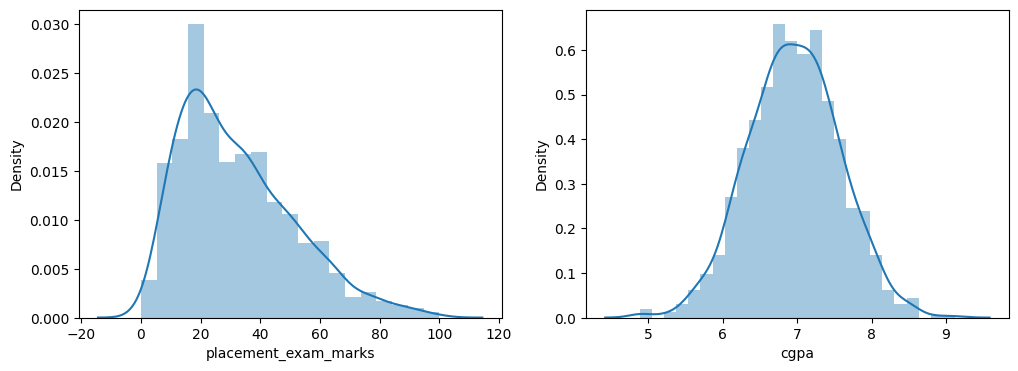

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(v["placement_exam_marks"])
plt.subplot(1,2,2)
sns.distplot(v["cgpa"])

84.5 -23.5


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='placement_exam_marks'>

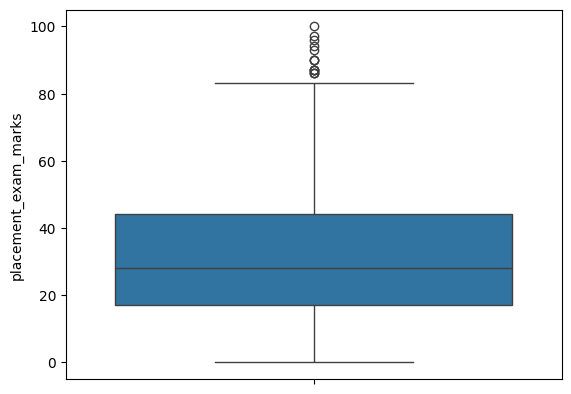

In [8]:
#placement dataset is right skew
#the aply the quantile method
#we need to find the upper_limit,lower_limit,iqr,q1,q3
v["placement_exam_marks"].isnull().sum()
v["placement_exam_marks"].describe()
Q1=v["placement_exam_marks"].quantile(.25)
Q3=v["placement_exam_marks"].quantile(.75)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
print(upper_limit,lower_limit)
sns.boxplot(v["placement_exam_marks"])



In [9]:
print(Q1,Q3,IQR,upper_limit,lower_limit)

17.0 44.0 27.0 84.5 -23.5


In [10]:
#v["placement_exam_marks"]
m=[]
for i in v["placement_exam_marks"]:
    if i>upper_limit:
       m.append(i)
#total outlier
print(m)


[94.0, 86.0, 86.0, 93.0, 90.0, 87.0, 87.0, 87.0, 90.0, 96.0, 87.0, 90.0, 86.0, 97.0, 100.0]


In [11]:
#now we make a boundary for dettection of outliers
v_new_upper=v[v["placement_exam_marks"]>upper_limit]

In [12]:
v_new_lower=v[v["placement_exam_marks"]<lower_limit]
#here is no any outlier from lower_limit


<ipython-input-13-17e2ab8440bd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v["placement_exam_marks"])
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
<ipython-input-13-17e2ab8440bd>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating 

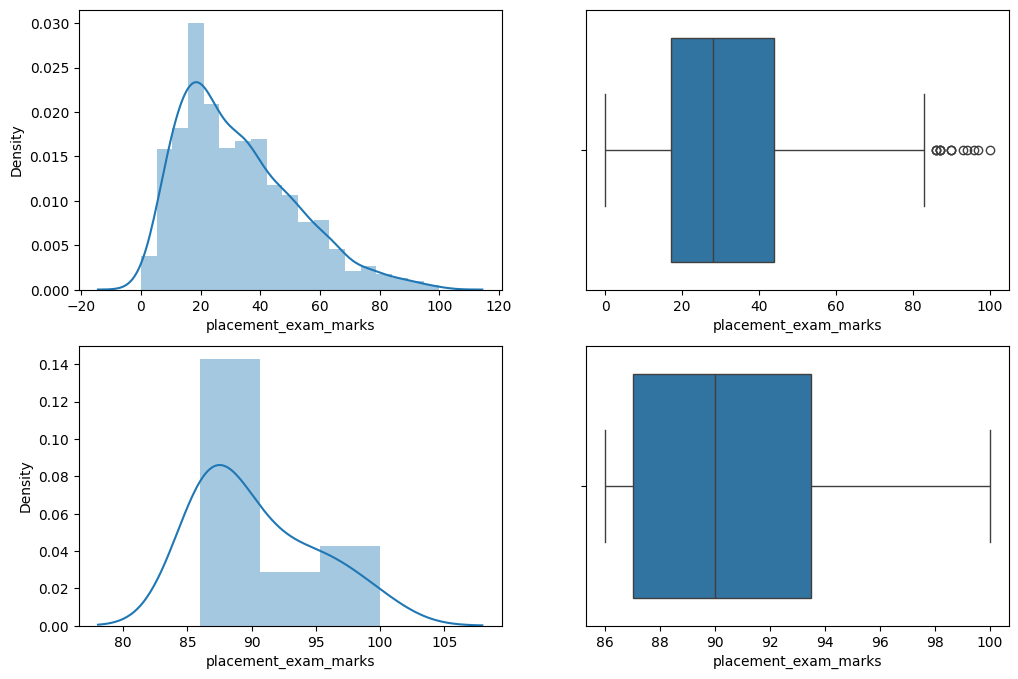

In [13]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.distplot(v["placement_exam_marks"])
plt.subplot(2,2,2)
sns.boxplot(x=v["placement_exam_marks"])
plt.subplot(2,2,3)
sns.distplot(v_new_upper["placement_exam_marks"])
plt.subplot(2,2,4)
sns.boxplot(x=v_new_upper["placement_exam_marks"])
plt.show()